In [1]:
import pandas as pd
import seaborn as sns
df = pd.read_csv('satData.csv')

In [2]:
df.drop(columns="Unnamed: 0", axis = 0, inplace=True)

<AxesSubplot:xlabel='GPA', ylabel='SAT'>

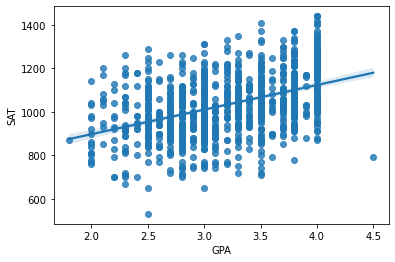

In [3]:
sns.regplot(x = 'GPA', y = 'SAT', data = df)

In [4]:
#df_1 = df.iloc[:700,:]
#df_2 = df.iloc[700:,:] splits datframe with pandas functions

In [5]:
#sat = []
#for i in range(700):
#    sat.append(df["SAT"][i])
#gpa = []
#for i in range(700):
#    gpa.append(df["GPA"][i])
#df700=pd.DataFrame(columns=[gpa,sat])

#sat2 = []
#for i in range(700,1000):
#    sat2.append(df["SAT"][i])
#gpa2 = []
#for i in range(700,1000):
#    gpa2.append(df["GPA"][i])
#df300=pd.DataFrame(columns=[gpa,sat])    another way of spliting less intuatve

In [6]:
def testTrainSplit(data):
    length = len(df.index)
    split = int(length*0.7)
    train = data[0:split]
    test = data[split+1:length]
    return train, test  #miss spints fuction for spliting

In [7]:
train, test = testTrainSplit(df)

In [8]:
#LINER MODLE
# b will always be -1

# findSums(a,b,c)
# returns the sum of the distances of points for a given a,b,c vaule

# getBestSlope()
# find the best slope useing the findSums(a,b,c) function 
# DOSE NOT CHANGE THE SLOPE
# only the integer value

#getBestYint
#find the best y vaule for a given a vaule

#getBestOverall
#retrusn a dictionary of the ax+by+c=0 and the sums of distances
# uses all of the fuctions

In [9]:
def findSums(a,b,c):
    sums=0
    for i in range(0,len(train)-1):
        sums += abs((abs((a*train["GPA"][i])+(b*train["SAT"][i])+(c))/((a**2+b**2)**0.5)))
    return sums

def getBestSlope(c):
    compSums=[]
    for i in range(250):
        compSums.append(findSums(i,-1,c))
    ret = compSums[0]
    ret1 = 0
    for i in range(len(compSums)-1):
        if compSums[i+1]<ret:
            ret = compSums[i+1]
            ret1 = compSums.index(ret)
    return ret1-1

def getBestYInt(a):
    compSums=[]
    for i in range(400,1600):
        compSums.append(findSums(a,-1,i))
    ret = compSums[0]
    ret1 = 0
    for i in range(len(compSums)-1):
        if compSums[i+1]<ret:
            ret = compSums[i+1]
            ret1 = compSums.index(ret)
    return ret, a, -1, ret1-400

def getBestOverall():
    dictHold = {}
    vaules,a,b,c = getBestYInt(getBestSlope(900))
    dictHold[0] = [vaules,a,b,c]
    for i in range(1,5):
        newC = dictHold[i-1][3]
        dictHold[i] = getBestYInt(getBestSlope(newC))
        if i == 25:
            print("halfway")
    return(dictHold)

In [10]:
dictBests = getBestSlope(400)

In [11]:
#bestTest = {"best":[100000,0,0,0]}
#for i in range(len(dictBests)):
#    if dictBests[i][0] < bestTest["best"][0]:
#        bestTest["best"]=dictBests[i]
#print(dictBests)

In [12]:
print(dictBests)

199


In [13]:
mse=0
for i in range(1,len(test)):
    mse += ((199*test["GPA"][i+700]+400)-test["SAT"][i+700])**2
mse = (mse/(len(test)))
print(mse)

16883.73585284281


In [57]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [59]:
regr = linear_model.LinearRegression()
regr.fit(train,train["SAT"])
diabetes_y_pred = regr.predict(test)

In [60]:
print("Coefficients: \n", regr.coef_)

Coefficients: 
 [4.03108608e-15 1.00000000e+00]


In [66]:
print("Mean squared error: %.2f" % mean_squared_error(test["SAT"], diabetes_y_pred))

Mean squared error: 0.00
